# Leitura do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('/home/ld_brito/CinUFPE/SiDi/Projeto1/Datasets/Diabetes/DataWorld_Diabetes_Prediction/data/diabetes_classification.csv')
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [2]:
diabetes.shape

(390, 16)

# Verificação de vazios e duplicatas

In [3]:
diabetes.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [4]:
diabetes.duplicated().sum()

0

# Ajuste dos tipos de variáveis

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [6]:
diabetes['gender'] = diabetes['gender'].replace(['male','female'],[1,0])
diabetes['diabetes'] = diabetes['diabetes'].replace(['Diabetes','No diabetes'],[1,0])

# Feature Selection

## Variáveis Numéricas

### Teste F

           Atributo       Score       P-valor
1           glucose  350.809177  3.205119e-56
4               age   38.936985  1.146990e-09
3    chol_hdl_ratio   31.242678  4.298115e-08
10            waist   20.377081  8.444225e-06
0       cholesterol   16.893380  4.827353e-05
8       systolic_bp   15.931795  7.853024e-05
12  waist_hip_ratio   12.348083  4.935038e-04
6            weight   10.588454  1.237749e-03
7               bmi    8.365055  4.040512e-03
11              hip    8.191726  4.436238e-03


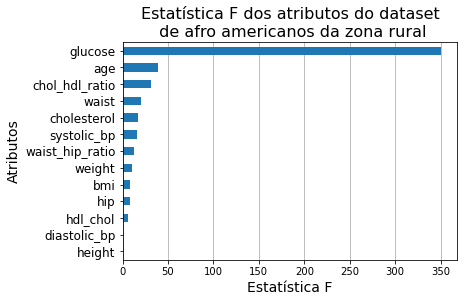

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Eliminação das variáveis contínuas
numeric_features = list(range(len(diabetes.columns)))
numeric_features.remove(0)
numeric_features.remove(6)
numeric_features.remove(15)

x = diabetes.iloc[:,numeric_features]
y = diabetes.iloc[:,-1]

# Ajuste da função
bestfeatures_f = f_classif(x,y)

# Criação do Dataframe
dfscores_f = pd.DataFrame(bestfeatures_f[0])
dfpvalues_f = pd.DataFrame(bestfeatures_f[1])
dfcolumns_f = pd.DataFrame(x.columns)
featureScores_f = pd.concat([dfcolumns_f,dfscores_f,dfpvalues_f],axis=1)
featureScores_f.columns = ['Atributo','Score','P-valor']
# Print dos atributos com p-valor menor do que 0.01
print(featureScores_f[featureScores_f['P-valor']<0.01].sort_values('P-valor',ascending = True))

# Plot dos atributos em um gráfico de barras
featureScores_f.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Estatística F dos atributos do dataset\n de afro americanos da zona rural",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Estatística F",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.savefig('barplot_dw_num_f.png',dpi=400,bbox_inches='tight')
plt.show()

### Mutual Information

           Atributo     Score
0           glucose  0.217655
1    chol_hdl_ratio  0.039955
2   waist_hip_ratio  0.039542
3               age  0.029528
4               bmi  0.024132
5               hip  0.020004
6             waist  0.018594
7       systolic_bp  0.016850
8            weight  0.015569
9      diastolic_bp  0.015256
10      cholesterol  0.008945
11           height  0.004993
12         hdl_chol  0.000028


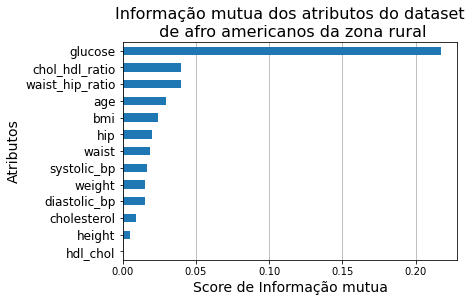

In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Eliminação das variáveis contínuas
numeric_features = list(range(len(diabetes.columns)))
numeric_features.remove(0)
numeric_features.remove(6)
numeric_features.remove(15)

x = diabetes.iloc[:,numeric_features]
y = diabetes.iloc[:,-1]

# Devido a natureza estocástica do método de aproximação dessa 
# função de mutual information para dados contínuos em relação aos discretos,
# é preciso realizar muitas repetições para obeter um resultado confiável
mean_mi=0
for i in range(100):
    bestfeatures_mi = mutual_info_classif(x,y,discrete_features=False)
    mean_mi += bestfeatures_mi/100
    
# Criação do Dataframe
dfscores_mi = pd.DataFrame(mean_mi)
dfcolumns_mi = pd.DataFrame(x.columns)
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Atributo','Score']  #nome das colunas do dataframe
# Print da tabela de Score de Mutual Information 
print(featureScores_mi.sort_values('Score',ascending = False).reset_index(drop=True))

# Plot dos atributos em um gráfico de barras
featureScores_mi.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Informação mutua dos atributos do dataset\n de afro americanos da zona rural",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Score de Informação mutua",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.savefig('barplot_dw_num_mu.png',dpi=400,bbox_inches='tight')
plt.show()

## Variáveis Categóricas

### Ki-Quadrado

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

x = diabetes['gender'].array.reshape(-1, 1)
y = diabetes.iloc[:,-1]

# Ajuste da função
bestfeatures_chi2 = chi2(x,y)

# Criação do Dataframe
dfscores_chi2 = pd.DataFrame(bestfeatures_chi2[0])
dfpvalues_chi2 = pd.DataFrame(bestfeatures_chi2[1])
dfcolumns_chi2 = pd.DataFrame(np.array(['gender']))
featureScores_chi2 = pd.concat([dfcolumns_chi2,dfscores_chi2,dfpvalues_chi2],axis=1)
featureScores_chi2.columns = ['Features','Score','P-values']  #naming the dataframe columns

# Print da tabela de Score e P-valor do Ki-Quadrado
print(featureScores_chi2)

  Features     Score  P-values
0   gender  0.054994   0.81459


### Mutual Information

In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

x = diabetes['gender'].array.reshape(-1, 1)
y = diabetes.iloc[:,-1]

bestfeatures_mi = mutual_info_classif(x,y,discrete_features=True)

# Criação do Dataframe
dfscores_mi = pd.DataFrame(bestfeatures_mi)
dfcolumns_mi = pd.DataFrame(np.array(['gender']))
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Atributo','Score']
# Print da tabela de Score de Mutual Information 
print(featureScores_mi)

  Atributo    Score
0   gender  0.00012
